In [712]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
from sqlalchemy import create_engine
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.metrics import roc_auc_score

Trying to classify and predict whether or not the borrower paid back their loan in full. 

In [620]:
lending_data = pd.read_csv("LoanStats_2019Q1.csv")

In [621]:
lending_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000.0,20000.0,20000.0,60 months,17.19%,499.10,C,C5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,12000.0,12000.0,12000.0,36 months,16.40%,424.26,C,C4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,3000.0,3000.0,3000.0,36 months,14.74%,103.62,C,C2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,35000.0,35000.0,35000.0,36 months,15.57%,1223.08,C,C3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,5000.0,5000.0,5000.0,36 months,15.57%,174.73,C,C3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [622]:
# lending_data.keys()

In [623]:
# lending_data.info()

In [624]:
# lending_data.describe()

In [625]:
# lending_data.isnull().values.any()
# lending_data.isnull().sum()

In [626]:
# print(lending_data.tail())

In [627]:
#Inspect the shape
lending_data = lending_data
print(lending_data.shape)

(115679, 144)


In [628]:
lending_data["int_rate"]=lending_data["int_rate"].str.replace(r"%","")
lending_data["revol_util"]=lending_data["revol_util"].str.replace(r"%","")
# lending_data["zip_code"]=lending_data["zip_code"].str.replace(r"xx","")
lending_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000.0,20000.0,20000.0,60 months,17.19,499.10,C,C5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,12000.0,12000.0,12000.0,36 months,16.40,424.26,C,C4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,3000.0,3000.0,3000.0,36 months,14.74,103.62,C,C2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,35000.0,35000.0,35000.0,36 months,15.57,1223.08,C,C3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,5000.0,5000.0,5000.0,36 months,15.57,174.73,C,C3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


"loan_amnt": "int_rate": The interest rate of the loan, as a proportio
"grade": 
"annual_inc": Reported annual income of the borrower. 
"dti": The debt-to-income ratio of the borrower (amount of debt divided by annual income) 
"delinq_2yrs": The number of times the borrower had been 30+ days past due on a payment in the past 2 years. 
"inq_last_6mths": The borrower's number of inquiries by creditors in the last 6 months. 
"open_acc": 
"pub_rec": The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments). 
"revol_bal": The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle). 
"revol_util": The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available). 
"total_acc": The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments)                              

In [629]:
lending_df = lending_data[["loan_status", "loan_amnt", "int_rate",'grade', "annual_inc","dti", "delinq_2yrs", "inq_last_6mths", "open_acc", "pub_rec", "revol_bal", "revol_util", "total_acc"]]
status = lending_df.groupby("loan_status").count()
status

,loan_amnt,int_rate,grade,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
loan_status,,,,,,,,,,,,
Charged Off,176,176,176,176,176,176,176,176,176,176,173,176
Current,109176,109176,109176,109176,108936,109176,109176,109176,109176,109176,109063,109176
Fully Paid,4730,4730,4730,4730,4716,4730,4730,4730,4730,4730,4719,4730
In Grace Period,538,538,538,538,537,538,538,538,538,538,538,538
Late (16-30 days),260,260,260,260,259,260,260,260,260,260,260,260
Late (31-120 days),795,795,795,795,794,795,795,795,795,795,793,795


In [630]:
# status.describe()

In [631]:
# status.isnull().values.any()
# status.isnull().sum()

In [632]:

#Create the upsample and downsample
small_sample = lending_df[(lending_df["loan_status"] == "Charged Off") | (lending_df["loan_status"] == "Late (31-120 days)")]
large_sample = lending_df[(lending_df["loan_status"] == "Fully Paid")]


In [633]:
small_sample.head()
large_sample.head()

,loan_status,loan_amnt,int_rate,grade,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
64,Fully Paid,25200.0,15.57,C,65000.0,15.18,0.0,0.0,4.0,0.0,17271.0,78.50,16.0
87,Fully Paid,17500.0,17.19,C,82000.0,15.70,1.0,0.0,12.0,0.0,15296.0,83.60,27.0
91,Fully Paid,10000.0,13.90,C,90000.0,7.92,0.0,1.0,5.0,0.0,9898.0,58.60,6.0
105,Fully Paid,13750.0,28.80,D,17808.0,30.12,0.0,2.0,6.0,0.0,16814.0,87.60,8.0
133,Fully Paid,10000.0,12.40,B,38000.0,38.66,0.0,0.0,7.0,0.0,8334.0,49,18.0


In [634]:
lending_df['loan_status'].value_counts(normalize=False, dropna=False)

Current               109176
Fully Paid              4730
Late (31-120 days)       795
In Grace Period          538
Late (16-30 days)        260
Charged Off              176
NaN                        4
Name: loan_status, dtype: int64

In [698]:
lending_df['loan_status'].value_counts(normalize=True, dropna=False)

Current               0.943784
Fully Paid            0.040889
Late (31-120 days)    0.006872
In Grace Period       0.004651
Late (16-30 days)     0.002248
Charged Off           0.001521
NaN                   0.000035
Name: loan_status, dtype: float64

In [636]:
small_sample = small_sample.dropna()

In [637]:
large_sample = large_sample.dropna()

In [638]:
# small_sample.isnull().values.any()
# large_sample.isnull().sum()

In [639]:
n_class0 = len(small_sample)
n_class1 = len(large_sample)

under = large_sample.sample(n_class0)
sample_df = pd.concat([under, small_sample], axis=0)

len(sample_df)

1930

In [640]:
X = sample_df[["loan_status", "loan_amnt", "int_rate",'grade', "annual_inc","dti", "delinq_2yrs", "inq_last_6mths", "open_acc", "pub_rec", "revol_bal", "revol_util", "total_acc"]]
y = sample_df["loan_status"].values.reshape(-1,1)
print(X.shape, y.shape)

(1930, 13) (1930, 1)


Label Definition 
For classification model, both Late status and Charged Off are assigned 0 anD fully Paid is assigned label 1

In [641]:
# We filtered out loans whose statuses are not yet
# final, such as “Current” and “Late (31-120 days)”.
# We treat “Fully Pad” as our positive label 1 , and “Changed Off” or
# “Charged Off” as negative

data_binary_encoded = pd.get_dummies(sample_df, columns=["loan_status"])
data_binary_encoded.head()

,loan_amnt,int_rate,grade,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,loan_status_Charged Off,loan_status_Fully Paid,loan_status_Late (31-120 days)
56665,17000.0,14.47,C,75000.0,17.70,0.0,1.0,7.0,0.0,3712.0,22.50,17.0,0,1,0
29683,5500.0,7.56,A,60000.0,35.56,0.0,0.0,11.0,0.0,12875.0,31.60,26.0,0,1,0
103974,5000.0,11.80,B,100000.0,16.91,0.0,2.0,16.0,0.0,22330.0,29.70,23.0,0,1,0
96073,12000.0,17.97,D,48000.0,10.40,1.0,2.0,9.0,1.0,297.0,3,15.0,0,1,0
86461,40000.0,6.46,A,80000.0,25.64,0.0,0.0,16.0,0.0,141548.0,71,25.0,0,1,0


In [642]:
sample_df["loan_category"] = np.where(sample_df["loan_status"] == "Fully Paid", 1, 0) #??? 
sample_df.head()

,loan_status,loan_amnt,int_rate,grade,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,loan_category
56665,Fully Paid,17000.0,14.47,C,75000.0,17.70,0.0,1.0,7.0,0.0,3712.0,22.50,17.0,1
29683,Fully Paid,5500.0,7.56,A,60000.0,35.56,0.0,0.0,11.0,0.0,12875.0,31.60,26.0,1
103974,Fully Paid,5000.0,11.80,B,100000.0,16.91,0.0,2.0,16.0,0.0,22330.0,29.70,23.0,1
96073,Fully Paid,12000.0,17.97,D,48000.0,10.40,1.0,2.0,9.0,1.0,297.0,3,15.0,1
86461,Fully Paid,40000.0,6.46,A,80000.0,25.64,0.0,0.0,16.0,0.0,141548.0,71,25.0,1


In [643]:
# Dataset of size ....., with (what is the % of negatives and positives)????

In [644]:
sample_df['loan_status'].value_counts(normalize=False, dropna=False)

Fully Paid            965
Late (31-120 days)    792
Charged Off           173
Name: loan_status, dtype: int64

In [645]:
sample_df['loan_status'].value_counts(normalize=True, dropna=False)

Fully Paid            0.500000
Late (31-120 days)    0.410363
Charged Off           0.089637
Name: loan_status, dtype: float64

In [646]:
sample_df['loan_category'].value_counts(normalize=False, dropna=False)

1    965
0    965
Name: loan_category, dtype: int64

In [647]:
data = sample_df.drop("loan_status", axis=1)
feature_names = data.columns
data.head()

,loan_amnt,int_rate,grade,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,loan_category
56665,17000.0,14.47,C,75000.0,17.70,0.0,1.0,7.0,0.0,3712.0,22.50,17.0,1
29683,5500.0,7.56,A,60000.0,35.56,0.0,0.0,11.0,0.0,12875.0,31.60,26.0,1
103974,5000.0,11.80,B,100000.0,16.91,0.0,2.0,16.0,0.0,22330.0,29.70,23.0,1
96073,12000.0,17.97,D,48000.0,10.40,1.0,2.0,9.0,1.0,297.0,3,15.0,1
86461,40000.0,6.46,A,80000.0,25.64,0.0,0.0,16.0,0.0,141548.0,71,25.0,1


In [648]:
# data.count()

In [649]:
# data.isnull().values.any()

In [650]:
data_grade = pd.get_dummies(data, columns=["grade"])
data_grade.head(10)

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,loan_category,grade_A,grade_B,grade_C,grade_D,grade_E,grade_G
56665,17000.0,14.47,75000.0,17.70,0.0,1.0,7.0,0.0,3712.0,22.50,17.0,1,0,0,1,0,0,0
29683,5500.0,7.56,60000.0,35.56,0.0,0.0,11.0,0.0,12875.0,31.60,26.0,1,1,0,0,0,0,0
103974,5000.0,11.80,100000.0,16.91,0.0,2.0,16.0,0.0,22330.0,29.70,23.0,1,0,1,0,0,0,0
96073,12000.0,17.97,48000.0,10.40,1.0,2.0,9.0,1.0,297.0,3,15.0,1,0,0,0,1,0,0
86461,40000.0,6.46,80000.0,25.64,0.0,0.0,16.0,0.0,141548.0,71,25.0,1,1,0,0,0,0,0
101972,5000.0,10.72,189000.0,10.29,0.0,1.0,14.0,0.0,2468.0,2,34.0,1,0,1,0,0,0,0
85940,5000.0,13.56,19000.0,19.52,0.0,1.0,4.0,0.0,1195.0,6,12.0,1,0,0,1,0,0,0
38181,10800.0,13.90,77000.0,14.14,0.0,1.0,11.0,0.0,10407.0,26.80,16.0,1,0,0,1,0,0,0
15935,3500.0,6.46,50000.0,0.84,0.0,0.0,4.0,0.0,1506.0,2.60,15.0,1,1,0,0,0,0,0
71823,12000.0,7.56,145000.0,11.07,0.0,1.0,9.0,0.0,9898.0,20.20,32.0,1,1,0,0,0,0,0


In [651]:
# data_grade.isnull().values.any()

In [652]:

y = data_grade["loan_category"]
X = data_grade.drop("loan_category", axis=1)
print(X.shape, y.shape)

(1930, 17) (1930,)


In [653]:
from sklearn.preprocessing import StandardScaler
X_transformed =StandardScaler().fit_transform(X)

In [654]:
#2/3 YOUR ORIGINAL DATA SET AS THE TRAINING SET
#1/3 remains will compose the test set.
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
#EXPLIT THE DATA IN TO ???

In [655]:
# X_train
# y_train

In [656]:
clf = tree.DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
clf.score(X_test, y_test)

0.5341614906832298

In [657]:
# clf

In [658]:
print(f"Training Data Score: {clf.score(X_train, y_train)}")
print(f"Testing Data Score: {clf.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.5341614906832298


In [709]:
predition = clf.predict(X_test)
from sklearn.metrics import accuracy_score
dt_score = accuracy_score(y_test, predition)
dt_score # we see an accuracy of 52.3%

0.5341614906832298

In [660]:
from sklearn.metrics import mean_squared_error

prediction_1 = clf.predict(X_test)
MSE = mean_squared_error(y_test, prediction_1)
r2 = clf.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.4658385093167702, R2: 0.5341614906832298


In [661]:
sorted(zip(clf.feature_importances_, feature_names), reverse=True)

[(0.15037175898483873, 'annual_inc'),
 (0.13131407670642647, 'pub_rec'),
 (0.12761974136321766, 'revol_util'),
 (0.11677933523427671, 'revol_bal'),
 (0.10739636299766704, 'grade'),
 (0.10077357277346605, 'loan_amnt'),
 (0.09718647513281799, 'int_rate'),
 (0.07200039330718398, 'inq_last_6mths'),
 (0.03462208315732382, 'delinq_2yrs'),
 (0.018002038412444056, 'dti'),
 (0.011041628121250301, 'total_acc'),
 (0.0046117727054093135, 'open_acc'),
 (0.003225249734758315, 'loan_category')]

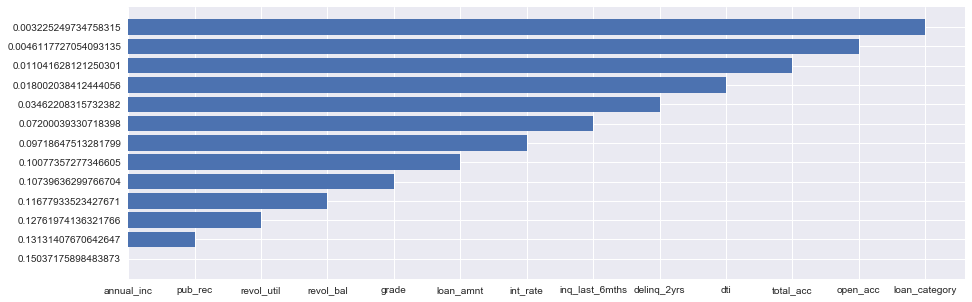

In [662]:
feature_importances = sorted(zip(clf.feature_importances_, feature_names), reverse=True)
feature_importances

freequency = []
words = []

for line in feature_importances:
    freequency.append(line[1])
    words.append(line[0])

y_axis = np.arange(1, len(words) + 1, 1)


plt.figure(figsize = (15,5))
plt.barh(y_axis, freequency,height=0.8, align='center')
plt.yticks(y_axis, words)
plt.show()

In [663]:
importances = clf.feature_importances_
importances

array([0.10077357, 0.09718648, 0.10739636, 0.15037176, 0.01800204,
       0.03462208, 0.07200039, 0.00461177, 0.13131408, 0.11677934,
       0.12761974, 0.01104163, 0.00322525, 0.00964119, 0.00897475,
       0.00643957, 0.        ])

"loan_amnt" ranges from $1.0 k to $40 k, with a median of 12k.

In [664]:
sample_df['loan_amnt'].describe()

count     1930.000000
mean     15726.075130
std      10421.885299
min       1000.000000
25%       8000.000000
50%      12550.000000
75%      22000.000000
max      40000.000000
Name: loan_amnt, dtype: float64

In [665]:
# viz_data

In [666]:
print('Classification Report')
print(classification_report(y_test,clusters))
print('\n')
print('Confusion Matrix')
confusion_matrix(y_test,clusters)

Classification Report
             precision    recall  f1-score   support

          0       0.58      0.56      0.57       236
          1       0.60      0.62      0.61       247

avg / total       0.59      0.59      0.59       483



Confusion Matrix


array([[133, 103],
       [ 95, 152]])

In [667]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y_test, clusters),
    columns=['Predicted Charged Off', 'Predicted Fully Paid '],
    index=['True ', 'True Paid Off'])

,Predicted Charged Off,Predicted Fully Paid
True,133,103
True Paid Off,95,152


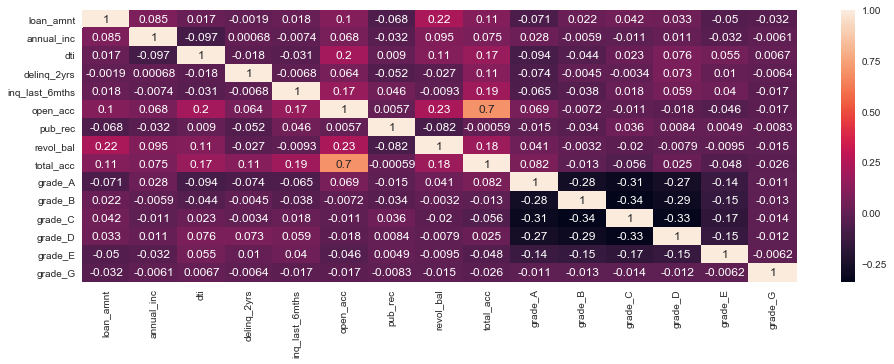

In [668]:
import seaborn as sns
plt.figure(figsize = (16,5))
sns.heatmap(X.corr(), annot=True)

In [669]:
def plot_var(col_name, full_name, df, continuous):
    """
    Visualize a variable with/without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True for continuous variables
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,3))
    # plot1: counts distribution of the variable
    
    if continuous:  
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)
    

    
# plot2: bar plot of the variable grouped by loan_status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        Charged_Off_rates = df.groupby(col_name)['loan_status'].value_counts(normalize=True)[:,'Charged Off']
        sns.barplot(x=Charged_Off_rates.index, y=Charged_Off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged Off')
        ax2.set_title('Charged Off Rate by ' + full_name)
        ax2.set_xlabel(full_name)
    
    # plot3: kde plot of the variable gropued by loan_status
    if continuous:  
        facet = sns.FacetGrid(df, hue = 'loan_status', size=3, aspect=4)
        facet.map(sns.kdeplot, col_name, shade=True)
        facet.add_legend()  
    else:
        fig = plt.figure(figsize=(12,3))
        sns.countplot(x=col_name, hue='loan_status', data=df, order=sorted(df[col_name].unique()) ) 
     
    plt.tight_layout()    
    


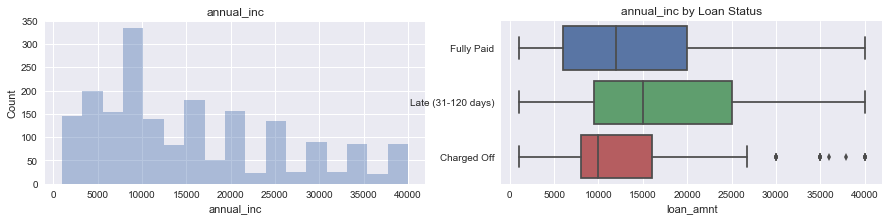

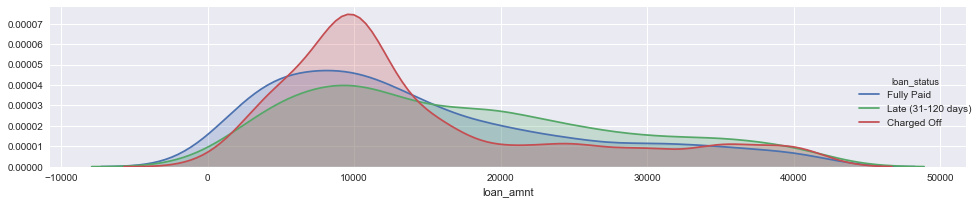

In [670]:
plot_var('loan_amnt', 'annual_inc',  viz_data, continuous=True,)

Random Forest


In [699]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200) #n_estimator is number of tree to be used in the forest
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test) 

0.6045548654244306

In [708]:
rfpredict = rf.predict(X_test)
from sklearn.metrics import accuracy_score
rf_score = accuracy_score(y_test, rfpredict) 
rf_score

0.6045548654244306

In [672]:
feature_importance = sorted(zip(rf.feature_importances_, feature_names), reverse=True)
feature_importance

[(0.1396790531225885, 'annual_inc'),
 (0.12576736466789648, 'grade'),
 (0.12029099447636592, 'pub_rec'),
 (0.11679735733940333, 'revol_bal'),
 (0.10728057533890618, 'revol_util'),
 (0.10412719762908988, 'loan_amnt'),
 (0.09537126785111356, 'int_rate'),
 (0.08339146349351644, 'inq_last_6mths'),
 (0.033355956919818824, 'delinq_2yrs'),
 (0.01879088438451786, 'dti'),
 (0.014140190402270946, 'open_acc'),
 (0.010422424980130678, 'total_acc'),
 (0.008309432163855797, 'loan_category')]

<BarContainer object of 13 artists>

<Figure size 432x288 with 0 Axes>

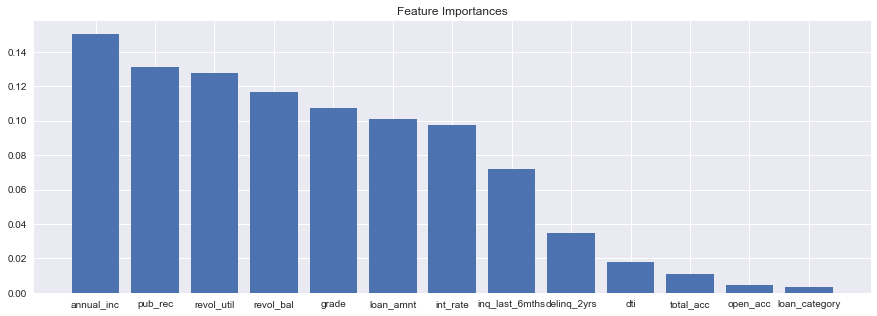

In [673]:
freequency_m = []
words_m = []

for line in feature_importances:
    freequency_m.append(line[1])
    words_m.append(line[0])

y_axis = np.arange(1, len(words) + 1, 1)

plt.figure()
plt.figure(figsize = (15,5))
plt.title("Feature Importances")
plt.bar(freequency_m, words_m )


In [674]:
importances = rf.feature_importances_
importances

array([1.04127198e-01, 9.53712679e-02, 1.25767365e-01, 1.39679053e-01,
       1.87908844e-02, 3.33559569e-02, 8.33914635e-02, 1.41401904e-02,
       1.20290994e-01, 1.16797357e-01, 1.07280575e-01, 1.04224250e-02,
       8.30943216e-03, 8.60118065e-03, 7.80218067e-03, 5.77643288e-03,
       9.60430199e-05])

In [675]:
print('Classification Report')
print(classification_report(y_test,rfpredict))
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test,rfpredict ))

Classification Report
             precision    recall  f1-score   support

          0       0.60      0.61      0.60       236
          1       0.62      0.61      0.61       247

avg / total       0.61      0.61      0.61       483



Confusion Matrix
[[143  93]
 [ 97 150]]


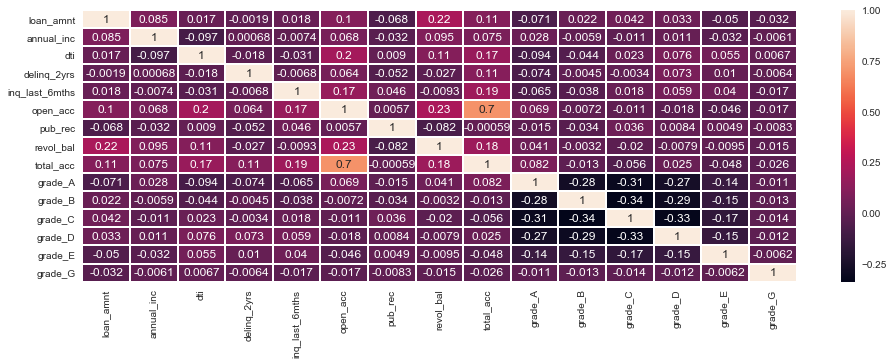

In [676]:
import seaborn as sns
plt.figure(figsize = (16,5))
sns.heatmap(X.corr(), annot=True,  linewidths=1)

PCA

K Nearest Neighbors

In [690]:
from sklearn.neighbors import KNeighborsClassifier


In [691]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [692]:
knn = knn.fit(X_train, y_train)
knn.score(X_test, y_test) 

0.5383022774327122

In [707]:
knn_predic = knn.predict(X_test)
from sklearn.metrics import accuracy_score
knn_score = accuracy_score(y_test, knn_predic)
knn_score

0.5383022774327122

k: 1, Train/Test Score: 1.000/0.524
k: 3, Train/Test Score: 0.766/0.509
k: 5, Train/Test Score: 0.697/0.547
k: 7, Train/Test Score: 0.677/0.549
k: 9, Train/Test Score: 0.667/0.534
k: 11, Train/Test Score: 0.654/0.551
k: 13, Train/Test Score: 0.647/0.567
k: 15, Train/Test Score: 0.628/0.559
k: 17, Train/Test Score: 0.619/0.565
k: 19, Train/Test Score: 0.628/0.538


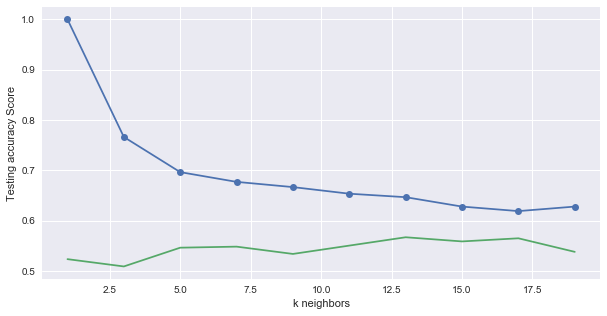

In [693]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

plt.figure(figsize = (10,5))    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [714]:
auroc_means

[0.5341614906832298, 0.6045548654244306, 0.5383022774327122]

Random Forest provides the best results on the training data 

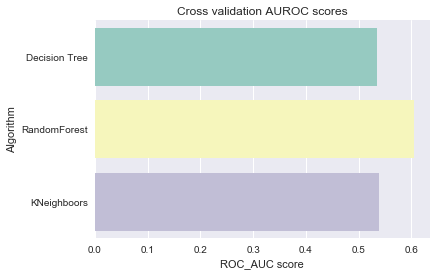

In [711]:
auroc_means = [dt_score, rf_score, knn_score]
auroc_res = pd.DataFrame({"AUROC":auroc_means,"Algorithm":["Decision Tree",
"RandomForest","KNeighboors"]})

g = sns.barplot("AUROC","Algorithm", data = auroc_res, palette="Set3",orient = "h")
g.set_xlabel("ROC_AUC score")
g = g.set_title("Cross validation AUROC scores")

In [713]:
# # 
# plt.figure(figsize = (20,10))
# sns.jointplot(x=features[2],y=features[8],data=X, color='purple')

PCA

In [715]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train.values)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])


In [716]:
principalDf.head(5)

,principal component 1,principal component 2
0,137231.649643,171362.036623
1,-61770.311829,-1451.557988
2,124960.616198,-34751.231492
3,-17347.809425,18229.352740
4,-15062.437571,34489.269944


In [717]:
y_train_df = pd.DataFrame(data=y_train.values, columns=['Charged_Off'])

In [718]:
# y_train.head()

In [719]:
finalDf = pd.concat([principalDf, y_train_df], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,Charged_Off
0,137231.649643,171362.036623,0
1,-61770.311829,-1451.557988,0
2,124960.616198,-34751.231492,0
3,-17347.809425,18229.352740,0
4,-15062.437571,34489.269944,1


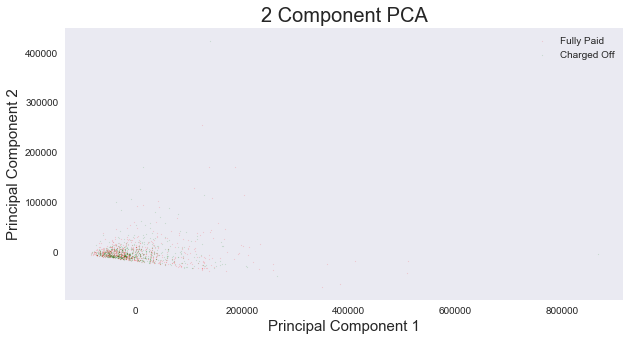

In [720]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Charged_Off'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 1, alpha=0.1)
ax.legend(['Fully Paid', 'Charged Off'])
ax.grid()

In [721]:
pca.explained_variance_ratio_

array([0.8742081 , 0.10703014])

Support Vector Machines 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC

In [ ]:
#  data_grade.head()

In [ ]:
svc = SVC()

In [ ]:
svc.fit(X_train, y_train)

In [ ]:
Y_pred = svc.predict(X_test)

In [ ]:
svc.score(X_train, y_train)